In [1]:
from peak_warming_calculator import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rc('font', family='serif')

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt

In [3]:
import time

In [4]:
from varying_g_peak_warming_calculator import *

## Sampling Constraint

In [5]:
consumption_growth_array = np.linspace(0.01, 0.035, 6)

In [6]:
consumption_growth_array

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035])

In [7]:
# Define the model inputs
problem_2 = {
'num_vars': 3,
'names': ['P_50/P_100', 'weak constraint', 'P_100'],
'bounds': [[0.4, 0.8],
[2.1, 3.1],
[100, 500]]
}
# Generate samples
param_values_2 = saltelli.sample(problem_2, 16)

In [8]:
P_100_list = []

for i in range(len(param_values_2)):
    P_100_list.append(param_values_2[i][2])

In [9]:
def vary_consumption_growth2(consumption_growth):
    Y = np.zeros([param_values_2.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_2.shape[0]])
    T_year_list = np.zeros([param_values_2.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_2)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_2[i][0]*param_values_2[i][2]
        P_100 = param_values_2[i][2]
        r = consumption_discount
        constraint = param_values_2[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
        s = r * np.log(constraint)/np.log((P_100)/(P_50))

        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(P_50=P_50, s=s, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=r, return_all_output=True)
        SCC_forecasted_0[i] = SCC_forecasted[0]
        start_year = 1750
        peak_T = Y[i]
        T_year_list[i] = next(x[0] for x in enumerate(T_complete) if x[1] == peak_T) + start_year
        if Y[i] < 1.4:
            print(param_values_2[i][0])
            print(param_values_2[i][1])
            print(consumption_discount)
            print(param_values_2[i][2])
    return Y, SCC_forecasted_0, T_year_list

In [10]:
Y_array = []
SCC_0_array = []
T_year_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0, T_year = vary_consumption_growth2(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)
    T_year_array.append(T_year)

0
18:50:05


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
18:51:10
16
18:52:14
24
18:53:22
32
18:54:36
40
18:55:47
48
18:56:58
56
18:57:59
64
18:59:02
72
19:00:12
80
19:01:12
88
19:02:22
96
19:03:22
104
19:04:18
112
19:05:19
120
19:06:16
0
19:07:21
8
19:07:58
16
19:08:35
24
19:08:59
32
19:09:36
40
19:10:15
48
19:10:44
56
19:11:21
64
19:11:55
72
19:12:27
80
19:13:05
88
19:13:41
96
19:14:18
104
19:14:48
112
19:15:25
120
19:15:50
0
19:16:29
8
19:16:56
16
19:17:22
24
19:17:47
32
19:18:11
40
19:18:31
48
19:18:55
56
19:19:21
64
19:19:49
72
19:20:13
80
19:20:40
88
19:21:05
96
19:21:31
104
19:22:02
112
19:22:26
120
19:22:54
0
19:23:22
8
19:23:45
16
19:24:08
24
19:24:31
32
19:24:54
40
19:25:19
48
19:25:42
56
19:26:06
64
19:26:30
72
19:26:54
80
19:27:16
88
19:27:38
96
19:28:02
104
19:28:28
112
19:28:50
120
19:29:14
0
19:29:34
8
19:29:55
16
19:30:17
24
19:30:36
32
19:30:56
40
19:31:18
48
19:31:37
56
19:31:56
64
19:32:15
72
19:32:35
80
19:32:54
88
19:33:14
96
19:33:36
104
19:33:55
112
19:34:14
120
19:34:36
0
19:34:56
8
19:35:14
16
19:35:33
24
19:35:50


Text(0, 0.5, 'Peak Warming')

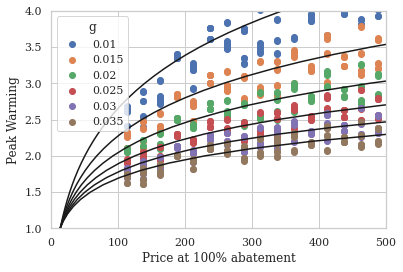

In [11]:
## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=np.round(consumption_growth_array[i], 3))

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1, 5,0.1)
g_bar = np.arange(0.01, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="g")
plt.xlim(0, 500)
plt.ylim(1, 4)
plt.xlabel("Price at 100% abatement")
plt.ylabel("Peak Warming")

In [12]:
# np.savetxt("parameter_sensitivity_runs/Y_array_condition", Y_array, delimiter=",")

In [13]:
# np.savetxt("parameter_sensitivity_runs/SCC_0_array_condition", SCC_0_array, delimiter=",")

### Plotting MAC curves for above

In [14]:
def abatement(P, P0, P_50, P_100, r=0.04, s=0.05):  # 0.05
    if P0 >= P_50:
        print("P0 is greater than P_50")
    elif ((P_100-P0)/(P_50-P0))**(s/r) <= 2:
        print("MAC curve condition not satisfied")
    
    P_h = P0 + ((P_50 - P0) ** (-s / r) - 2 * (P_100 - P0) ** (-s / r)) ** (-r / s)
    Am = 1 + ((P_100 - P0) / (P_h - P0)) ** (-s / r)
    
    A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
    
    return A

(20, 1000)

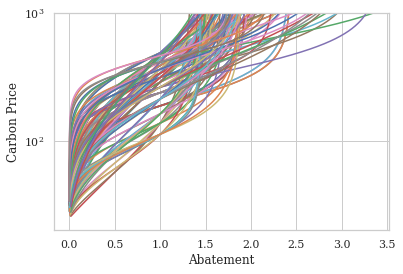

In [15]:
SCC_25 = np.arange(25, 1000)
consumption_growth = consumption_growth_array[0]

for i in range(len(param_values_2)):  # 20
    SCC = np.arange(SCC_0_array[0][i], 1000)
    P0 = SCC_25[0]
    P_50 = param_values_2[i][0]*param_values_2[i][2]
    P_100 = param_values_2[i][2]
    consumption_discount = consumption_growth + 0.015
    r = consumption_discount
    constraint = param_values_2[i][1]
    s = r * np.log(constraint)/np.log((P_100)/(P_50))
#     if constraint >2.5:
#     print(constraint)
    plt.plot(abatement(SCC, P0=P0, P_100=P_100, P_50=P_50, r=r, s=s), SCC)

plt.xlabel("Abatement")
plt.ylabel("Carbon Price")
plt.yscale("log")
# plt.legend(title="P0 ($)")
plt.ylim(20, 1000)

### Looking at SCC_0

In [16]:
SCC_0_array[0]

array([29.68541926, 32.06553107, 29.57904034, 31.52238776, 31.4051737 ,
       33.49635012, 31.99942865, 33.43970206, 33.45647697, 32.02923036,
       33.41809537, 31.99623475, 31.95115013, 30.21861254, 31.955343  ,
       30.14786504, 31.03562331, 31.24210671, 31.11941505, 31.03562331,
       31.11941505, 31.24210671, 31.31535387, 31.31535387, 32.00169577,
       32.23151543, 31.63057443, 32.00169577, 31.63057443, 32.23151543,
       31.88287298, 31.88287298, 32.51356164, 31.78364808, 32.54978896,
       32.51356164, 32.54978896, 31.78364808, 31.82744602, 31.82744602,
       32.35016543, 31.83231133, 32.35893413, 32.35016543, 32.35893413,
       31.83231133, 31.84614921, 31.84614921, 32.70385272, 29.89823808,
       32.83558876, 29.18916686, 29.3575483 , 25.75167644, 30.17819974,
       25.91979607, 26.97875985, 28.55633297, 26.83715343, 31.06560698,
       30.86708165, 32.27589862, 28.42058576, 32.1335639 , 30.13547499,
       32.77660145, 30.4944047 , 30.6648733 , 31.0328272 , 33.17

In [17]:
df = pd.DataFrame(SCC_0_array, index=np.round(consumption_growth_array,3)).transpose()

In [18]:
df

,0.010,0.015,0.020,0.025,0.030,0.035
0,29.685419,27.989806,26.599075,25.455374,24.500635,23.725774
1,32.065531,30.270268,28.756809,27.490316,26.413467,25.491130
2,29.579040,27.899402,26.520680,25.385762,24.437768,23.667528
3,31.522388,29.899466,28.513284,27.323221,26.301095,25.418151
4,31.405174,29.797126,28.421865,27.240689,26.225814,25.348930
...,...,...,...,...,...,...
123,30.718559,29.083485,27.700238,26.533247,25.539790,24.687657
124,30.924441,29.265056,27.856861,26.673697,25.667150,24.804328
125,33.802251,32.194996,30.722078,29.456934,28.320045,27.340010
126,34.065690,32.524492,31.078799,29.799180,28.666786,27.701315


In [19]:
# df.boxplot(whis=100)

Text(0, 0.5, 'Social Cost of Carbon in 2019 ($)')

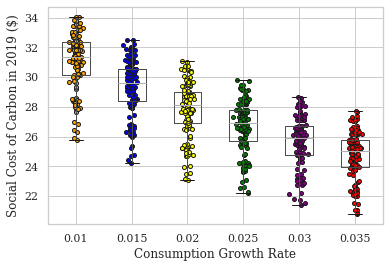

In [20]:
for i,d in enumerate(df):
    y = df[df.columns[i]]
    x = np.random.normal(i+1, 0.05, len(y))  # consumption_growth_array[i]
    plt.plot(x, y, mfc = ["orange","blue","yellow","green","purple","red"][i], mec='k', ms=4, marker="o", linestyle="None")
    
# plt.boxplot(df, whis=100)
df.boxplot(whis=100)
plt.xlabel("Consumption Growth Rate")
plt.ylabel("Social Cost of Carbon in 2019 ($)")

### Sobol

In [21]:
Y_array_condition = pd.read_csv("parameter_sensitivity_runs/Y_array_condition", header=None).transpose()
SCC_0_array_condition = pd.read_csv("parameter_sensitivity_runs/SCC_0_array_condition", header=None).transpose()

In [22]:
Si = sobol.analyze(problem_2, Y_array_condition[0].to_numpy(), print_to_console=True)

                       ST   ST_conf
P_50/P_100       0.214012  0.144161
weak constraint  0.000534  0.000515
P_100            0.694980  0.313956
                       S1   S1_conf
P_50/P_100       0.496501  0.328308
weak constraint  0.001288  0.020001
P_100            0.663531  0.544701
                                     S2   S2_conf
(P_50/P_100, weak constraint) -0.328011  0.484045
(P_50/P_100, P_100)           -0.554870  0.425198
(weak constraint, P_100)       0.002965  0.028594


In [23]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

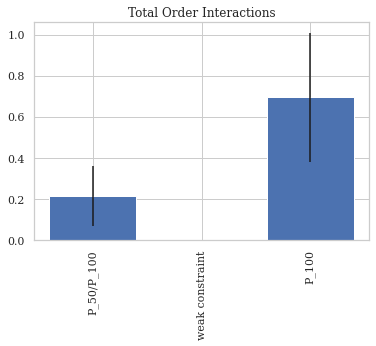

In [24]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

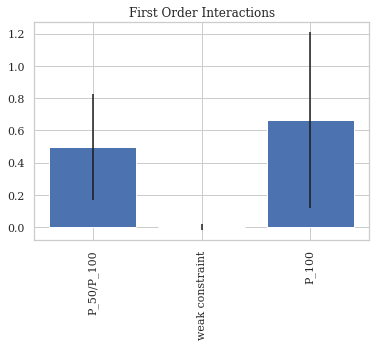

In [25]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

In [26]:
# Si.plot()

In [27]:
param_values_2 = saltelli.sample(problem_2, 256)

In [28]:
Y, SCC_0, T = vary_consumption_growth2(consumption_growth_array[i])

0
19:39:39


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
19:39:56
16
19:40:14
24
19:40:33
32
19:40:51
40
19:41:07
48
19:41:25
56
19:41:44
64
19:42:02
72
19:42:20
80
19:42:39
88
19:42:56
96
19:43:12
104
19:43:30
112
19:43:49
120
19:44:07
128
19:44:25
136
19:44:44
144
19:45:01
152
19:45:18
160
19:45:35
168
19:45:53
176
19:46:12
184
19:46:28
192
19:46:46
200
19:47:03
208
19:47:21
216
19:47:38
224
19:47:57
232
19:48:15
240
19:48:30
248
19:48:49
256
19:49:08
264
19:49:26
272
19:49:43
280
19:50:00
288
19:50:19
296
19:50:38
304
19:50:54
312
19:51:12
320
19:51:29
328
19:51:48
336
19:52:05
344
19:52:21
352
19:52:39
360
19:52:56
368
19:53:12
376
19:53:28
384
19:53:46
392
19:54:02
400
19:54:20
408
19:54:37
416
19:54:54
424
19:55:12
432
19:55:29
440
19:55:47
448
19:56:02
456
19:56:19
464
19:56:35
472
19:56:53
480
19:57:09
488
19:57:26
496
19:57:44
504
19:58:01
512
19:58:19
520
19:58:36
528
19:58:55
536
19:59:12
544
19:59:29
552
19:59:48
560
20:00:04
568
20:00:21
576
20:00:37
584
20:00:54
592
20:01:10
600
20:01:28
608
20:01:46
616
20:02:02
624
20:02:19

In [29]:
# np.savetxt("parameter_sensitivity_runs/Y_large", Y, delimiter=",")

In [30]:
Si = sobol.analyze(problem_2, Y, print_to_console=True)

                       ST   ST_conf
P_50/P_100       0.195017  0.032645
weak constraint  0.000715  0.000159
P_100            0.804033  0.115617
                       S1   S1_conf
P_50/P_100       0.202212  0.068859
weak constraint  0.000871  0.004329
P_100            0.800433  0.143511
                                     S2   S2_conf
(P_50/P_100, weak constraint) -0.007614  0.094140
(P_50/P_100, P_100)           -0.008119  0.131579
(weak constraint, P_100)      -0.000345  0.008134


In [31]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

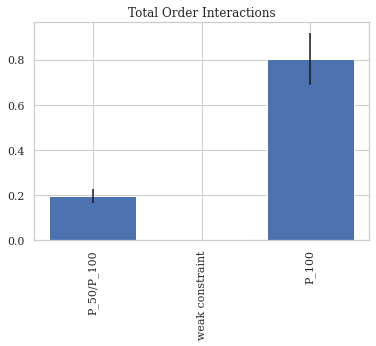

In [32]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

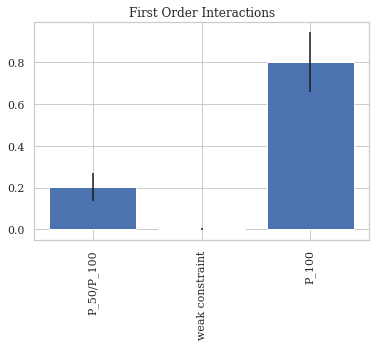

In [33]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

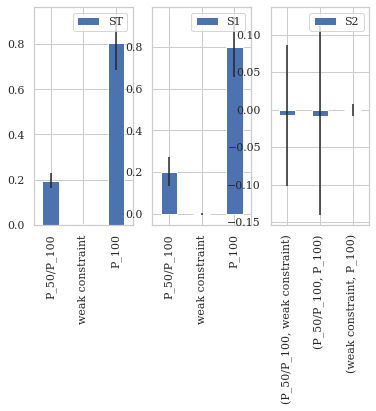

In [34]:
Si.plot()

In [35]:
# Define the model inputs
problem_2 = {
'num_vars': 3,
'names': ['P_50/P_100', 'weak constraint', 'P_100'],
'bounds': [[0.4, 0.8],
[2.1, 1000],
[100, 500]]
}
# Generate samples
param_values_2 = saltelli.sample(problem_2, 64)

In [36]:
Y, SCC_0 = vary_consumption_growth2(consumption_growth_array[i])

0
20:52:52


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
20:53:10
16
20:53:29
24
20:53:46
32
20:54:03
40
20:54:23
48
20:54:41
56
20:54:58
64
20:55:15
72
20:55:31
80
20:55:48
88
20:56:05
96
20:56:24
104
20:56:42
112
20:56:58
120
20:57:16
128
20:57:34
136
20:57:52
144
20:58:08
152
20:58:26
160
20:58:44
168
20:59:01
176
20:59:19
184
20:59:36
192
20:59:54
200
21:00:13
208
21:00:32
216
21:00:48
224
21:01:05
232
21:01:24
240
21:01:40
248
21:01:57
256
21:02:15
264
21:02:35
272
21:02:52
280
21:03:09
288
21:03:27
296
21:03:45
304
21:04:03
312
21:04:19
320
21:04:37
328
21:04:56
336
21:05:13
344
21:05:30
352
21:05:46
360
21:06:04
368
21:06:22
376
21:06:39
384
21:06:58
392
21:07:15
400
21:07:33
408
21:07:50
416
21:08:07
424
21:08:25
432
21:08:43
440
21:09:01
448
21:09:17
456
21:09:35
464
21:09:54
472
21:10:12
480
21:10:31
488
21:10:50
496
21:11:07
504
21:11:25


ValueError: too many values to unpack (expected 2)

In [ ]:
Si = sobol.analyze(problem_2, Y, print_to_console=True)

In [ ]:
total_Si, first_Si, second_Si = Si.to_df()

In [ ]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)